# global imports

In [1]:
from keras.preprocessing.image import ImageDataGenerator
import keras.preprocessing.image as preproc
import matplotlib.pyplot as plt
import math
import numpy as np
%matplotlib inline 

BATCH_SIZE=128

Using TensorFlow backend.


# data preparation

In [2]:
train_datagen = ImageDataGenerator(rescale = 1./255,
shear_range = 0.2,
zoom_range = 0.2,
horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)
training_set = train_datagen.flow_from_directory('dataset',
target_size = (64, 64),
batch_size = BATCH_SIZE,
class_mode = 'categorical')

Found 20 images belonging to 2 classes.


In [3]:
print(training_set)
from keras import backend as K
K.set_image_dim_ordering('tf')

# plot dataset batch

D:\anaconda\envs\TensGPU\lib\site-packages\PIL\Image.py:969: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


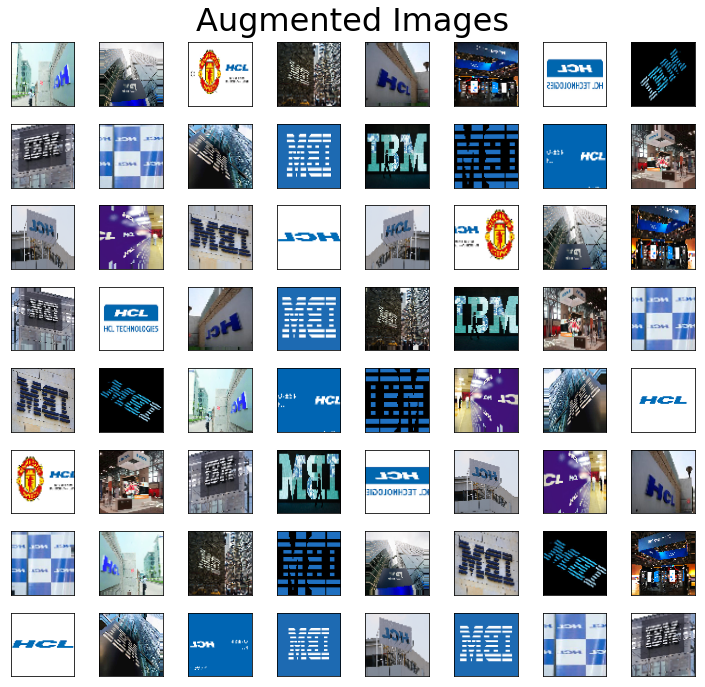

In [4]:

def plot_images(img_gen, img_title, rows, columns):
    fig, ax = plt.subplots(rows,columns, figsize=(10,10))
    plt.suptitle(img_title, size=32)
    plt.setp(ax, xticks=[], yticks=[])
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    picCount=0
    for (img, label) in img_gen:
        for image in img:
            ax[math.floor(picCount/columns)][picCount%columns].imshow(image)
            picCount=picCount+1
            if (picCount>=rows*columns):
                return
        
plot_images(training_set, "Augmented Images", 8, 8)

# classifier model

In [5]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# training 

In [6]:
model.fit_generator(
        training_set,
        steps_per_epoch=2000 // BATCH_SIZE,
        epochs=5)

Epoch 1/5


D:\anaconda\envs\TensGPU\lib\site-packages\PIL\Image.py:969: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


15/15 [==============================] - 25s 2s/step - loss: 0.6443 - acc: 0.6700
Epoch 2/5
15/15 [==============================] - 24s 2s/step - loss: 0.3703 - acc: 0.8467
Epoch 3/5
15/15 [==============================] - 23s 2s/step - loss: 0.2877 - acc: 0.8967
Epoch 4/5
15/15 [==============================] - 25s 2s/step - loss: 0.1035 - acc: 0.9533
Epoch 5/5
15/15 [==============================] - 24s 2s/step - loss: 0.0420 - acc: 0.9933


# elaborate the prediction

In [38]:
def getPredictionResult(pred):
    if (pred[0]>pred[1]):
        return "HCL"
    else:
        return "IBM"
    
def predictImage(path):
    img=preproc.load_img(path, target_size = (64, 64), interpolation = "nearest")
    img_big=preproc.load_img(path, target_size = (256, 256), interpolation = "nearest")
    plt.imshow(img_big)
    npimg=np.array(img)/255.0
    pred=model.predict(np.array([npimg]))[0]
    print(pred.tolist())
    print(getPredictionResult(pred))

# predict ibm test images

[0.37831294536590576, 0.6216869950294495]
IBM


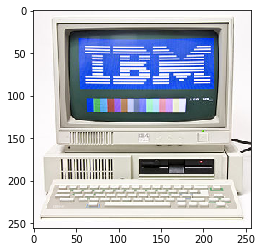

In [39]:
predictImage('test/ibm/ibm.jpg')

[0.04509942606091499, 0.9549006223678589]
IBM


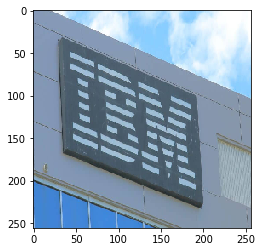

In [40]:
predictImage('test/ibm/3.jpg')

# predict hcl test images

[0.6968328952789307, 0.3031671345233917]
HCL


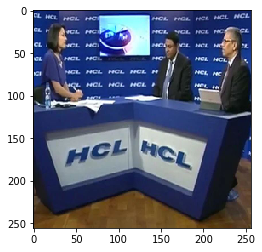

In [41]:
predictImage('test/hcl/1.jpg')

# Whoops cases

[0.9997209906578064, 0.0002790150756482035]
HCL


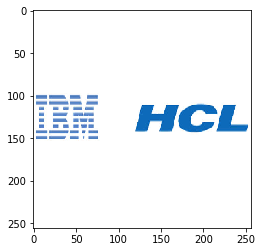

In [42]:
predictImage('test/ibm/ibm_hcl.jpg')

[0.002437344752252102, 0.9975626468658447]
IBM


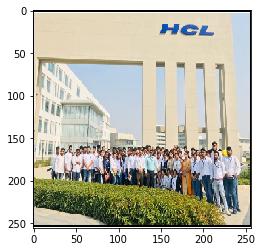

In [43]:
predictImage('test/hcl/hcl.png')

[0.999474823474884, 0.000525160925462842]
HCL


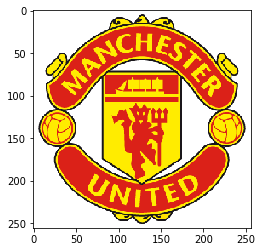

In [45]:
predictImage('test/hcl/mu.png')

[5.167527294958063e-09, 1.0]
IBM


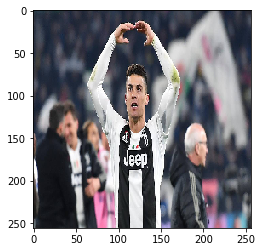

In [47]:
predictImage('test/ibm/4.jpg')